In [1]:
%matplotlib inline
import time
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
startyear = int(input("請輸入起始西元年:"))
startmonth = int(input("請輸入起始前一月:"))
endyear = int(input("請輸入結束西元年:"))
endmonth = int(input("請輸入結束月份:"))
stocknumber = input("請輸入股票代碼:")

請輸入起始西元年:2015
請輸入起始前一月:12
請輸入結束西元年:2019
請輸入結束月份:3
請輸入股票代碼:2330


In [3]:
start = datetime.date(startyear, startmonth, 1)
end = datetime.date(endyear, endmonth, 1)
price = []
day = []

In [4]:
for month in range(100):
    # print(month)
    start = datetime.date(start.year + (start.month // 12), ((start.month % 12) + 1), 1)
    if start.month < 10:
        url = "http://www.twse.com.tw/exchangeReport/STOCK_DAY?response=csv&date=" + str(start.year) + "0" + str(start.month) + "01&stockNo=" + str(stocknumber)
    else:
        url = "http://www.twse.com.tw/exchangeReport/STOCK_DAY?response=csv&date=" + str(start.year) + str(start.month) + "01&stockNo=" + str(stocknumber)

    time.sleep(3)
    s = pd.read_csv(url, encoding="big5", header = 1, delimiter=',')
    s.columns = ['date', 'shares', 'amount', 'open', 'high', 'low', 'close', 'change', 'turnover', '']
    index = 0
    for i in s["close"]:
        if i >= 0:
            price.append(i)
            day.append(s["date"][index])
            index += 1
        else:    
            break

    if start == end:
        break
        
print("Done")


Done


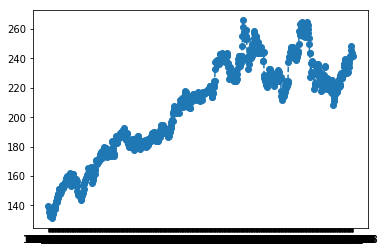

In [5]:
plt.plot(day, price, '--o')
plt.show()